In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

#### Разбираемся, что означают все столбцы:

Информация об атрибутах (по порядку):
         - CRIM    - уровень преступности на душу населения
         - ZN      - доля жилой земли, для участков более 25 000 кв. Футов.
         - INDUS   - доля не-розничных бизнес-кварталов на город
         - CHAS    - пересечение реки (= 1, если дорога ограничивает реку; 0 в противном случае)
         - NOX     - концентрация оксидов азота (на 10 миллионов)
         - RM      - среднее количество комнат в жилом помещении
         - AGE     - доля занимаемых владельцами квартир, построенных до 1940 года
         - DIS     - взвешенное расстояние до пяти бостонских центров занятости
         - RAD     - индекс доступности к радиальным магистралям
         - TAX     - налоговая ставка на $10 000
         - PTRATIO - cоотношение учеников и учителей в городе
         - B       - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих в городе.
         - LSTAT   - доля населения с низким статусом
         - MEDV    - Медианная стоимость домов, занимаемых владельцами, в $1000

В целом все показатели могут иметь отношение к стоимости жилья, даже доля чернокожих в городе.

#### Рассматриваем детально, что из себя представляют данные, есть ли пропуски, смотрим на статистические показатели.

In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Есть существенные различия между 75% квартилем и максимальным значением по столбцу CRIM. Построим гистограмму отдельно по столбцу CRIM.

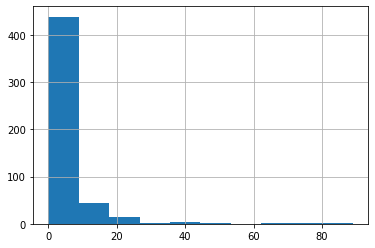

In [7]:
data['CRIM'].hist()

Отберем только значения с уровнем криминала больше 30.

In [8]:
data.query('CRIM > 30')

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
404  41.5292  0.0   18.1     0  0.693  5.531   85.4  1.6074   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666   
414  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   
427  37.6619  0.0   18.1     0  0.679  6.202   78.7  1.8629   24  666   

     PTRATIO       B  LSTAT  MEDV  
380     20.2  396.90  17.21  10.4  
398     20.2  396.90  30.59   5.0  
404     20.2  329.46  27.38   8.5  
405     20.2  384.97  22.98   5.0  
410     20.2    2.60  10.11  15.0  
414     20.2   88.27  36.98   7.0  
418     20.2   16.45  20.62   8.8  
427     20.2   18.82  14.52  10.9

Всего получается 8 значений или 1,56% от общей БД. Уровень криминала более 89% означает, что почти каждый человек - преступник. **Очень странное место!** Также эти строки имеют одинаковые значения в следующих столбцах: ZN, INDUS, CHAS, RAD, TAX, PTRATIO. 

Построим общий график

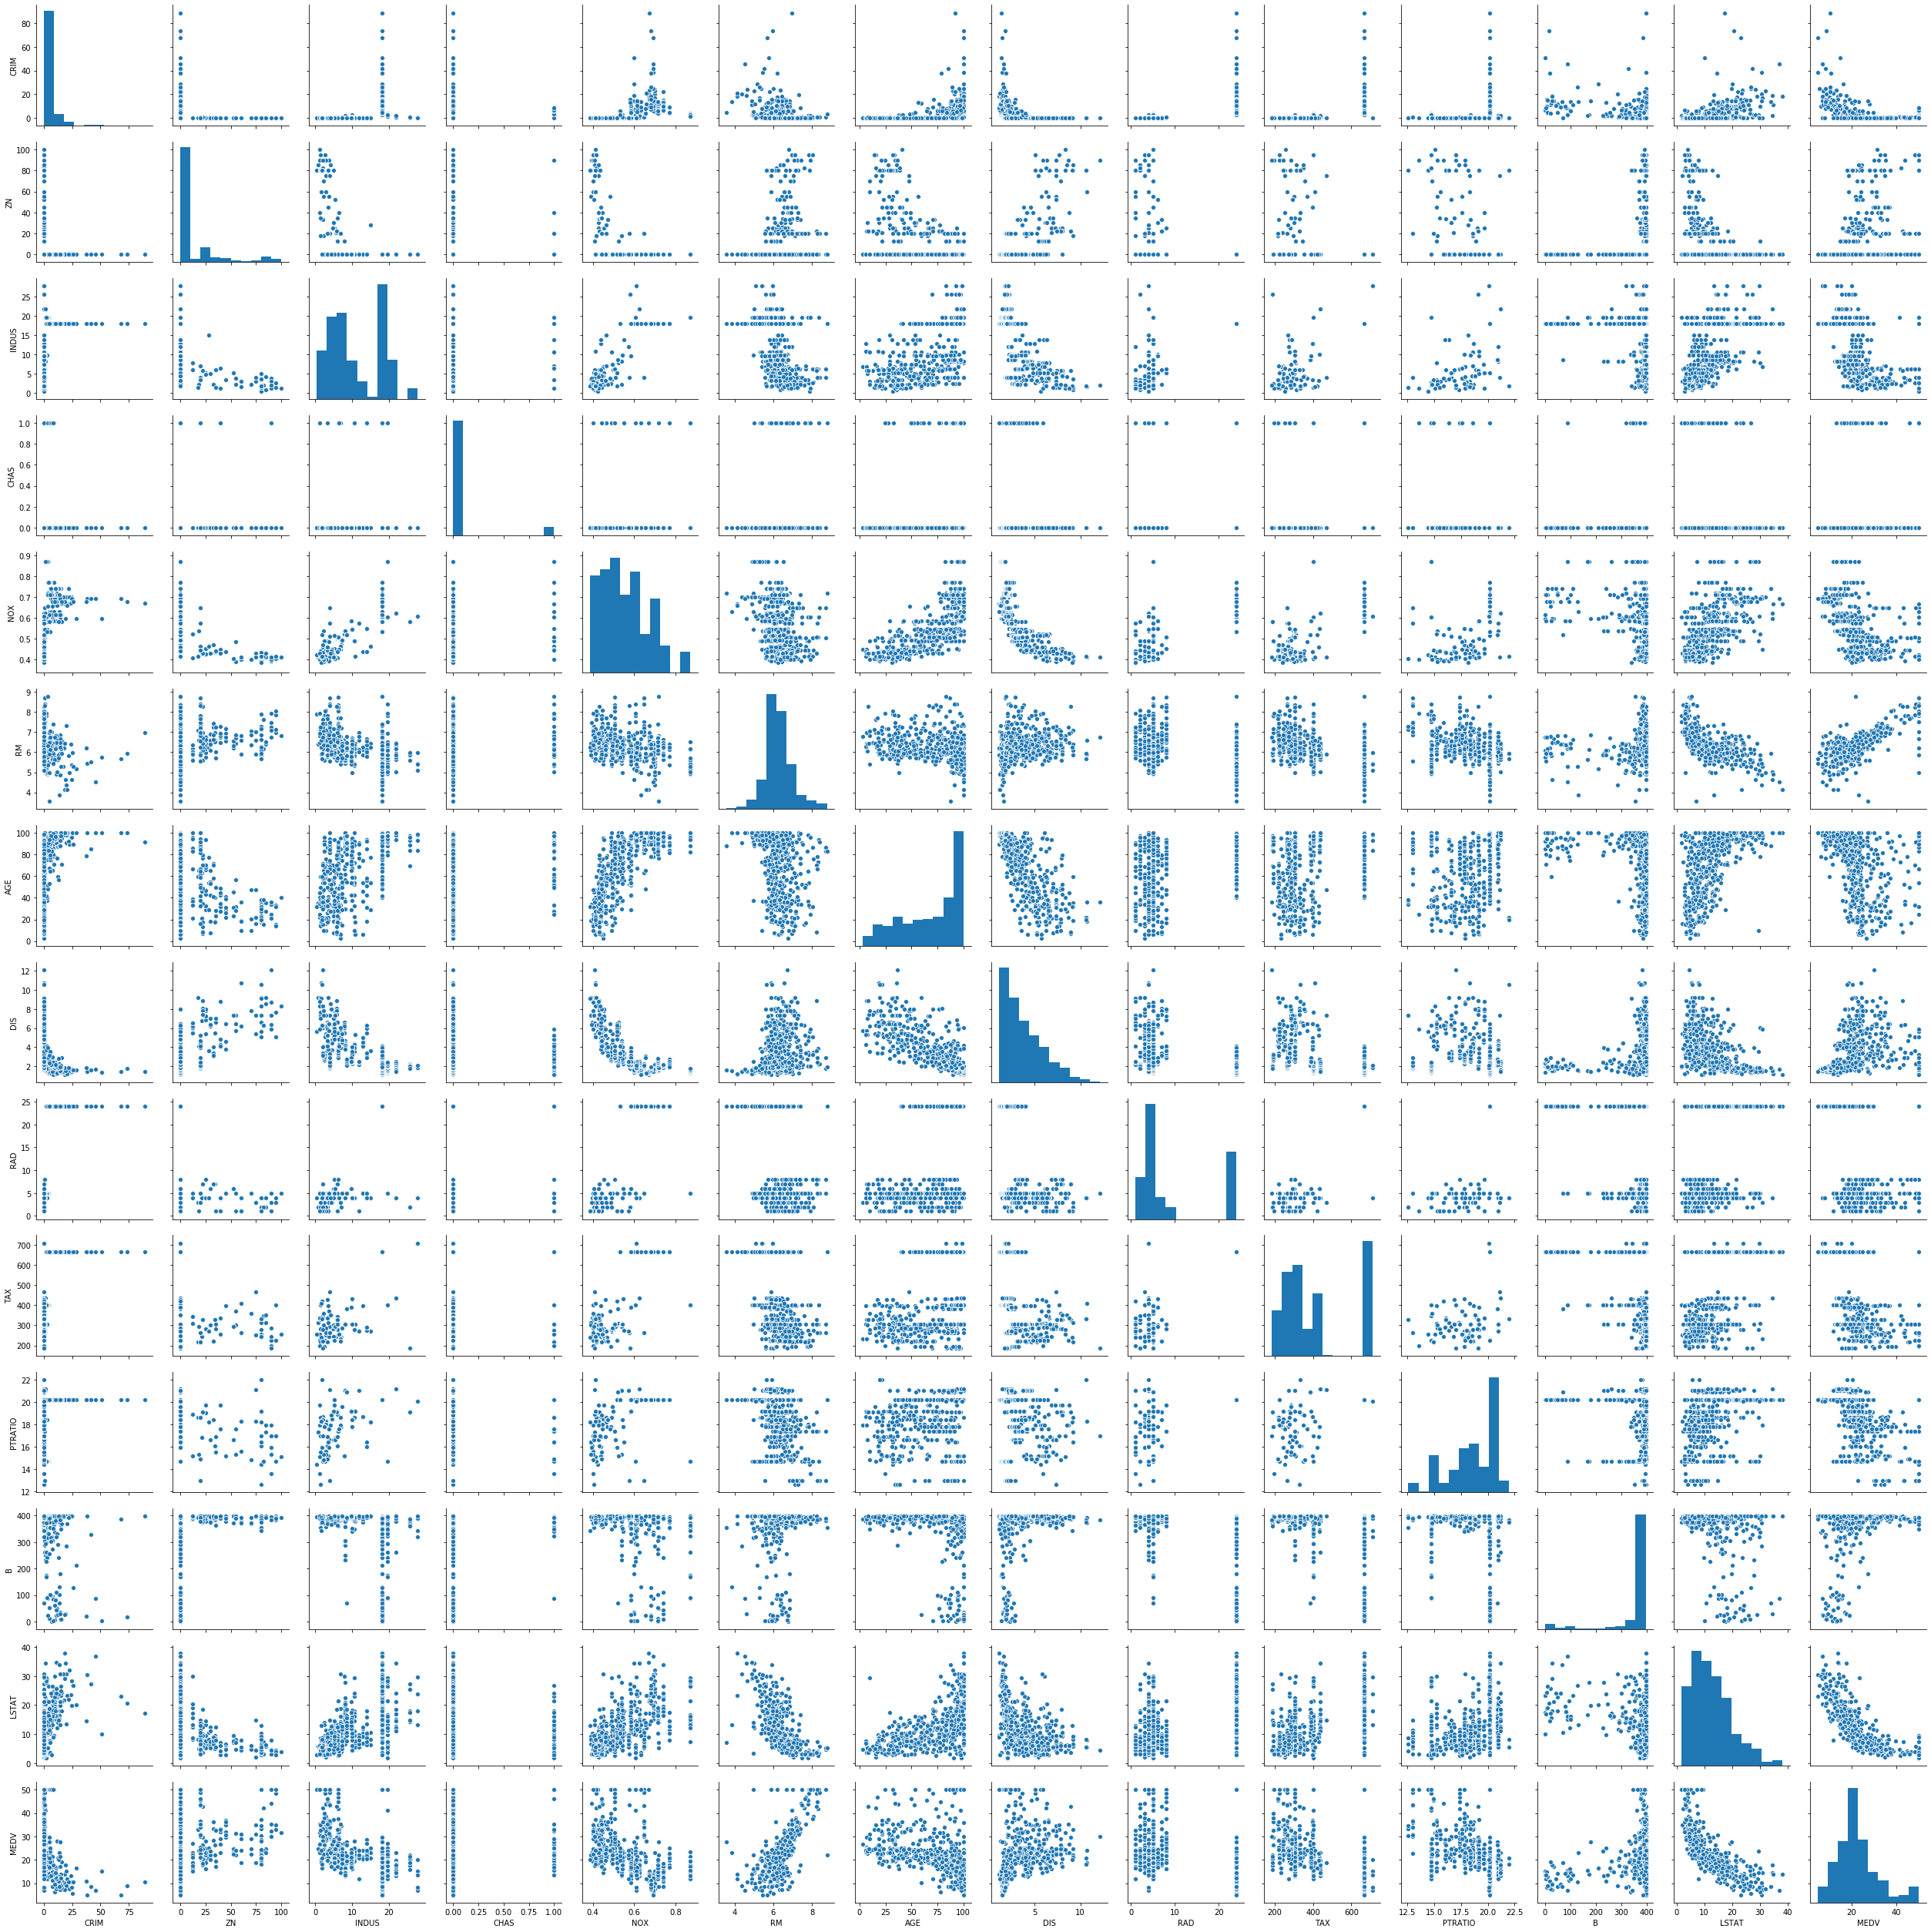

In [9]:
sns.pairplot(data)

На частотном графике по значениям RAD имеется отдельный стобец. Посмотрим этот график поближее.

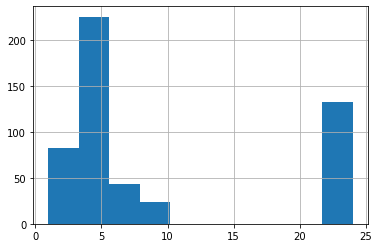

In [10]:
data['RAD'].hist()

Выделим данные, относящиеся только к правому столбцу

In [11]:
rad20_up = data.query('RAD > 20')

In [12]:
rad20_up.head()

CRIM   ZN  INDUS  CHAS   NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
356  8.98296  0.0   18.1     1  0.77  6.212  97.4  2.1222   24  666     20.2   
357  3.84970  0.0   18.1     1  0.77  6.395  91.0  2.5052   24  666     20.2   
358  5.20177  0.0   18.1     1  0.77  6.127  83.4  2.7227   24  666     20.2   
359  4.26131  0.0   18.1     0  0.77  6.112  81.3  2.5091   24  666     20.2   
360  4.54192  0.0   18.1     0  0.77  6.398  88.0  2.5182   24  666     20.2   

          B  LSTAT  MEDV  
356  377.73  17.60  17.8  
357  391.34  13.27  21.7  
358  395.43  11.48  22.7  
359  390.74  12.67  22.6  
360  374.56   7.79  25.0

In [13]:
rad20_up.describe()

CRIM     ZN         INDUS        CHAS         NOX          RM  \
count  132.000000  132.0  1.320000e+02  132.000000  132.000000  132.000000   
mean    12.759291    0.0  1.810000e+01    0.060606    0.672417    6.022152   
std     13.041169    0.0  4.636122e-14    0.239515    0.061004    0.718449   
min      2.378570    0.0  1.810000e+01    0.000000    0.532000    3.561000   
25%      5.686307    0.0  1.810000e+01    0.000000    0.614000    5.713000   
50%      9.084990    0.0  1.810000e+01    0.000000    0.693000    6.176000   
75%     14.333700    0.0  1.810000e+01    0.000000    0.713000    6.419000   
max     88.976200    0.0  1.810000e+01    1.000000    0.770000    8.780000   

              AGE         DIS    RAD    TAX       PTRATIO           B  \
count  132.000000  132.000000  132.0  132.0  1.320000e+02  132.000000   
mean    89.805303    2.061254   24.0  666.0  2.020000e+01  288.089167   
std     12.625809    0.617901    0.0    0.0  1.426499e-14  145.860431   
min     40.300000    1.129600   24.0  666.0  2.020000e+01    0.320000   
25%     85.925000    1.589250   24.0  666.0  2.020000e+01  167.375000   
50%     94.400000    1.943400   24.0  666.0  2.020000e+01  373.740000   
75%     98.825000    2.431300   24.0  666.0  2.020000e+01  395.292500   
max    100.000000    4.098300   24.0  666.0  2.020000e+01  396.900000   

            LSTAT        MEDV  
count  132.000000  132.000000  
mean    18.600606   16.403788  
std      6.905296    8.539745  
min      2.960000    5.000000  
25%     14.175000   11.225000  
50%     17.910000   14.400000  
75%     23.045000   19.900000  
max     37.970000   50.000000

Всего их получилось 132, а это 26% БД, что довольно много. При этом можно заметить, что стандартное отклонение у 5 признаков равно 0, т.е. они все одинаковые и их можно смело исключать. Это ZN, INDUS, RAD, TAX, PTRATIO. Кстати, здесь все наши выбросы по криминалу.

Посмотрим, что осталось в БД без RAD>20

In [15]:
rad24_low = data.query('RAD < 20')
rad24_low.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  374.000000  374.000000  374.000000  374.000000  374.000000  374.000000   
mean     0.385606   15.374332    8.679171    0.072193    0.513146    6.377275   
std      0.625107   25.973104    6.364368    0.259153    0.101179    0.673874   
min      0.006320    0.000000    0.460000    0.000000    0.385000    4.903000   
25%      0.060543    0.000000    4.050000    0.000000    0.437900    5.927250   
50%      0.132100    0.000000    6.910000    0.000000    0.493000    6.231000   
75%      0.366227   22.000000   10.590000    0.000000    0.547000    6.724000   
max      4.097400  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  374.000000  374.000000  374.000000  374.000000  374.000000  374.000000   
mean    61.081818    4.406968    4.449198  317.262032   17.839840  380.880455   
std     28.301473    2.104713    1.632885   81.518766    2.211023   39.498595   
min      2.900000    1.321600    1.000000  187.000000   12.600000   70.800000   
25%     36.225000    2.654100    4.000000  270.000000   16.400000  383.742500   
50%     62.900000    4.017150    4.000000  305.000000   18.000000  392.780000   
75%     88.475000    5.835525    5.000000  384.000000   19.200000  396.322500   
max    100.000000   12.126500    8.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  374.000000  374.000000  
mean    10.553930   24.695989  
std      5.946278    8.421564  
min      1.730000    7.000000  
25%      6.160000   19.400000  
50%      9.440000   22.650000  
75%     13.495000   28.400000  
max     34.410000   50.000000

Оставим все значения RAD, но всё-таки уберем выбросы по CRIM > 30

In [18]:
t_data = data.query('CRIM < 30')

In [37]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 14 columns):
CRIM       498 non-null float64
ZN         498 non-null float64
INDUS      498 non-null float64
CHAS       498 non-null int64
NOX        498 non-null float64
RM         498 non-null float64
AGE        498 non-null float64
DIS        498 non-null float64
RAD        498 non-null int64
TAX        498 non-null int64
PTRATIO    498 non-null float64
B          498 non-null float64
LSTAT      498 non-null float64
MEDV       498 non-null float64
dtypes: float64(11), int64(3)
memory usage: 58.4 KB


In [46]:
X_columns = t_data.columns[:-1]
y_column = t_data.columns[-1]

X_columns, y_column

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'), 'MEDV')

In [42]:
X = t_data[X_columns]
y = t_data[y_column]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6593314835422598
RMSE: 	 5.703673640247789
MAE: 	 3.7338747331290767


In [ ]:
Значение коэффициента детерминации довольно низкое, так что модель получилась не очень хорошая.

In [73]:
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_train)
print('Error: {}'.format(mean_absolute_error(pred_values, y_train)))

Weights: [-4.04473843e-02  3.56880451e-02  1.81376753e-02  1.39764449e+00
 -1.61633637e+01  4.22802256e+00 -5.77574309e-03 -1.28672295e+00
  2.67444701e-01 -1.35439144e-02 -1.00151096e+00  8.97581242e-03
 -4.75625402e-01]
Bias: 33.751025749474294
Error: 3.0781252375495365


In [74]:
# pandas_profiling делает какой-то расчет, но выводит пустое белое поле. Версия стоит скаченная v2.3.0.
# с версией v1.4.1, которая была в стоке, pandas_profiling дает довольно куций отчет

# пока ситуацию версией v2.3.0 не победил 

In [75]:
import pandas_profiling

In [76]:
data.profile_report()